# Nanodegree Engenheiro de Machine Learning
## Aprendizado Supervisionado
## Projeto: Encontrando doadores para a *CharityML*

Seja bem-vindo ao segundo projeto do Nanodegree Engenheiro de Machine Learning! Neste notebook, você receberá alguns códigos de exemplo e será seu trabalho implementar as funcionalidades adicionais necessárias para a conclusão do projeto. As seções cujo cabeçalho começa com **'Implementação'** indicam que o bloco de código posterior requer funcionalidades adicionais que você deve desenvolver. Para cada parte do projeto serão fornecidas instruções e as diretrizes da implementação estarão marcadas no bloco de código com uma expressão `'TODO'`. 
Por favor, leia cuidadosamente as instruções!

Além de implementações de código, você terá de responder questões relacionadas ao projeto e à sua implementação. Cada seção onde você responderá uma questão terá um cabeçalho com o termo **'Questão X'**. Leia com atenção as questões e forneça respostas completas nas caixas de texto que começam com o termo **'Resposta:'**. A submissão do seu projeto será avaliada baseada nas suas resostas para cada uma das questões além das implementações que você disponibilizar.

>**Nota:** Por favor, especifique QUAL A VERSÃO DO PYTHON utilizada por você para a submissão deste notebook. As células "Code" e "Markdown" podem ser executadas utilizando o atalho do teclado **Shift + Enter**. Além disso, as células "Markdown" podem ser editadas clicando-se duas vezes na célula.


## Iniciando

Neste projeto, você utilizará diversos algoritmos de aprendizado supervisionado para modelar com precisão a remuneração de indivíduos utilizando dados coletados no censo americano de 1994. Você escolherá o algoritmo mais adequado através dos resultados preliminares e irá otimizá-lo para modelagem dos dados. O seu objetivo com esta implementação é construir um modelo que pode predizer com precisão se um indivíduo possui uma remuneração superior a $50,000. Este tipo de tarefa pode surgir em organizações sem fins lucrativos que sobrevivem de doações. Entender a remuneração de um indivíduo pode ajudar a organização o montante mais adequado para uma solicitação de doação, ou ainda se eles realmente deveriam entrar em contato com a pessoa. Enquanto pode ser uma tarefa difícil determinar a faixa de renda de uma pesssoa de maneira direta, nós podemos inferir estes valores através de outros recursos disponíveis publicamente. 

O conjunto de dados para este projeto se origina do [Repositório de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income) e foi cedido por Ron Kohavi e Barry Becker, após a sua publicação no artigo _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. Você pode encontrar o artigo de Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). Os dados que investigaremos aqui possuem algumas pequenas modificações se comparados com os dados originais, como por exemplo a remoção da funcionalidade `'fnlwgt'` e a remoção de registros inconsistentes.


----
## Explorando os dados
Execute a célula de código abaixo para carregas as bibliotecas Python necessárias e carregas os dados do censo. Perceba que a última coluna deste cojunto de dados, `'income'`, será o rótulo do nosso alvo (se um indivíduo possui remuneração igual ou maior do que $50,000 anualmente). Todas as outras colunas são dados de cada indívduo na base de dados do censo.

In [48]:
# Importe as bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Permite a utilização da função display() para DataFrames.

# Importação da biblioteca de visualização visuals.py
import visuals as vs

# Exibição amigável para notebooks
%matplotlib inline

# Carregando os dados do Censo
data = pd.read_csv("census.csv")

# Sucesso - Exibindo o primeiro registro
display(data.head(n=4))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


### Implementação: Explorando os Dados

Uma investigação superficial da massa de dados determinará quantos indivíduos se enquadram em cada grupo e nos dirá sobre o percentual destes indivúdos com remuneração anual superior à \$50,000. No código abaixo, você precisará calcular o seguinte:
- O número total de registros, `'n_records'`
- O número de indivíduos com remuneração anual superior à \$50,000, `'n_greater_50k'`.
- O número de indivíduos com remuneração anual até \$50,000, `'n_at_most_50k'`.
- O percentual de indivíduos com remuneração anual superior à \$50,000, `'greater_percent'`.

** DICA: ** Você pode precisar olhar a tabela acima para entender como os registros da coluna `'income'` estão formatados.

In [49]:
# TODO: Número total de registros.
n_records = data.size

# TODO: Número de registros com remuneração anual superior à $50,000
n_greater_50k = data.loc[data['income'] == '>50K' ].size

# TODO: O número de registros com remuneração anual até $50,000
filter = data['income'] != ">50K"
n_at_most_50k = data.loc[filter].size

# TODO: O percentual de indivíduos com remuneração anual superior à $50,000

greater_percent = float(n_greater_50k)/float(n_records) 

# Exibindo os resultados
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 633108
Individuals making more than $50,000: 156912
Individuals making at most $50,000: 476196
Percentage of individuals making more than $50,000: 0.25%


** Explorando as colunas **
* **age**: contínuo. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: contínuo. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: contínuo. 
* **capital-loss**: contínuo. 
* **hours-per-week**: contínuo. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparando os dados
Antes de que os dados possam ser utilizados como input para algoritmos de machine learning, muitas vezes eles precisam ser tratados, formatados e reestruturados — este processo é conhecido como **pré-processamento**. Felizmente neste conjunto de dados não existem registros inconsistentes para tratamento, porém algumas colunas precisam ser ajustadas. Este pré-processamento pode ajudar muito com o resultado e poder de predição de quase todos os algoritmos de aprendizado.

### Transformando os principais desvios das colunas contínuas
Um conjunto de dados pode conter ao menos uma coluna onde os valores tendem a se próximar para um único número, mas também podem conter registros com o mesmo atributo contendo um valor muito maior ou muito menor do que esta tendência. Algoritmos podem ser sensíveis para estes casos de distribuição de valores e este fator pode prejudicar sua performance se a distribuição não estiver normalizada de maneira adequada. Com o conjunto de dados do censo, dois atributos se encaixam nesta descrição: '`capital-gain'` e `'capital-loss'`.

Execute o código da célula abaixo para plotar um histograma destes dois atributos. Repare na distribuição destes valores.

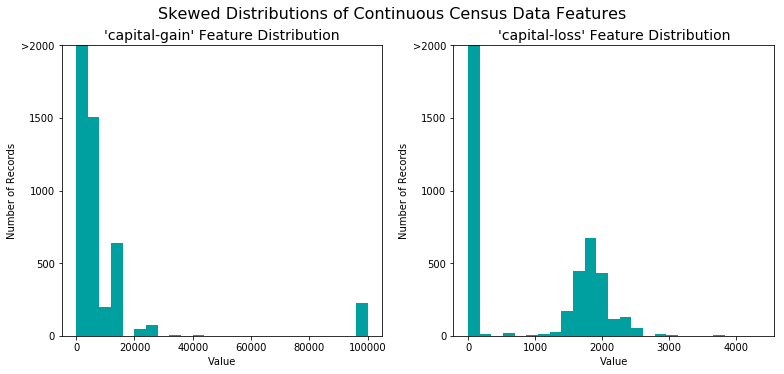

In [50]:
# Dividindo os dados entre features e coluna alvo
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualizando os principais desvios das colunas contínuas entre os dados
vs.distribution(data)

Para atributos com distribuição muito distorcida, tais como `'capital-gain'` e `'capital-loss'`, é uma prática comum aplicar uma <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">transformação logarítmica</a> nos dados para que os valores muito grandes e muito pequenos não afetem a performance do algoritmo de aprendizado. Usar a transformação logarítmica reduz significativamente os limites dos valores afetados pelos outliers (valores muito grandes ou muito pequenos). Deve-se tomar cuidado ao aplicar esta transformação, poir o logaritmo de `0` é indefinido, portanto temos que incrementar os valores em uma pequena quantia acima de `0` para aplicar o logaritmo adequadamente.

Execute o código da célula abaixo para realizar a transformação nos dados e visualizar os resultados. De novo, note os valores limite e como os valores estão distribuídos.

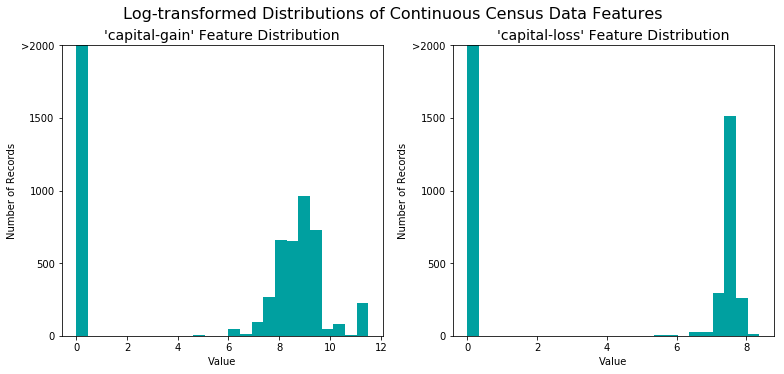

In [51]:
# Aplicando a transformação de log nos registros distorcidos.
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualizando as novas distribuições após a transformação.
vs.distribution(features_log_transformed, transformed = True)

### Normalizando atributos numéricos
Além das transformações em atributos distorcidos, é uma boa prática comum realizar algum tipo de adaptação de escala nos atributos numéricos. Ajustar a escala nos dados não modifica o formato da distribuição de cada coluna (tais como `'capital-gain'` ou `'capital-loss'` acima); no entanto, a normalização garante que cada atributo será tratado com o mesmo peso durante a aplicação de aprendizado supervisionado. Note que uma vez aplicada a escala, a observação dos dados não terá o significado original, como exemplificado abaixo.

Execute o código da célula abaixo para normalizar cada atributo numérico, nós usaremos ara isso a [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [52]:
# Importando sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inicializando um aplicador de escala e aplicando em seguida aos atributos
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Exibindo um exemplo de registro com a escala aplicada
display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementação: Pré-processamento dos dados

A partir da tabela em **Explorando os dados** acima, nós podemos observar que existem diversos atributos não-numéricos para cada registro. Usualmente, algoritmos de aprendizado esperam que os inputs sejam numéricos, o que requer que os atributos não numéricos (chamados de *variáveis de categoria*) sejam convertidos. Uma maneira popular de converter as variáveis de categoria é utilizar a estratégia **one-hot encoding**. Esta estratégia cria uma variável para cada categoria possível de cada atributo não numérico. Por exemplo, assuma que `algumAtributo` possuí três valores possíveis: `A`, `B`, ou `C`. Nós então transformamos este atributo em três novos atributos: `algumAtributo_A`, `algumAtributo_B` e `algumAtributo_C`.


|   | algumAtributo |                    | algumAtributo_A | algumAtributo_B | algumAtributo_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Além disso, assim como os atributos não-numéricos, precisaremos converter a coluna alvo não-numérica, `'income'`, para valores numéricos para que o algoritmo de aprendizado funcione. Uma vez que só existem duas categorias possíveis para esta coluna ("<=50K" e ">50K"), nós podemos evitar a utilização do one-hot encoding e simplesmente transformar estas duas categorias para `0` e `1`, respectivamente. No trecho de código abaixo, você precisará implementar o seguinte:
 - Utilizar [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para realizar o one-hot encoding nos dados da `'features_log_minmax_transform'`.
 - Converter a coluna alvo `'income_raw'` para re.
   - Transforme os registros com "<=50K" para `0` e os registros com ">50K" para `1`.

In [53]:
# TODO: Utilize o one-hot encoding nos dados em 'features_log_minmax_transform' utilizando pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Faça o encode da coluna 'income_raw' para valores numéricos
income = pd.get_dummies(income_raw)

# Exiba o número de colunas depois do one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Descomente a linha abaixo para ver as colunas após o encode
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Embaralhar e dividir os dados
Agora todas as _variáveis de categoria_ foram convertidas em atributos numéricos e todos os atributos numéricos foram normalizados. Como sempre, nós agora dividiremos os dados entre conjuntos de treinamento e de teste. 80% dos dados serão utilizados para treinamento e 20% para teste.

Execute o código da célula abaixo para realizar divisão.

In [54]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income['>50K'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Avaliando a performance do modelo
Nesta seção nós investigaremos quatro algoritmos diferentes e determinaremos qual deles é melhor para a modelagem dos dados. Três destes algoritmos serão algoritmos de aprendizado supervisionado de sua escolha e o quarto algoritmo é conhecido como *naive predictor*.

### Métricas e o Naive predictor

*CharityML*, equipada com sua pesquisa, sabe que os indivíduos que fazem mais do que \$50,000 possuem maior probabilidade de doar para a sua campanha de caridade. Por conta disto, a *CharityML* está particularmente interessada em predizer com acurácia quais indivíduos possuem remuneração acima de \$50,000. Parece que utilizar **acurácia (accuracy)** como uma métrica para avaliar a performance de um modelo é um parâmetro adequado. Além disso, identificar alguém que *não possui* remuneração acima de \$50,000 como alguém que recebe acima deste valor seria ruim para a *CharityML*, uma vez que eles estão procurando por indivíduos que desejam doar. Com isso, a habilidade do modelo em predizer com preisão aqueles que possuem a remuneração acima dos \$50,000 é *mais importante* do que a habilidade de realizar o **recall** destes indivíduos. Nós podemos utilizar a fórmula **F-beta score** como uma métrica que considera ambos: precision e recall.


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Em particular, quando $\beta = 0.5$, maior ênfase é atribuída para a variável precision. Isso é chamado de **F$_{0.5}$ score** (ou F-score, simplificando).

Analisando a distribuição de classes (aqueles que possuem remuneração até \$50,000 e aqueles que possuem remuneração superior), fica claro que a maioria dos indivíduos não possui remuneração acima de \$50,000. Isto pode ter grande impacto na **acurácia (accuracy)**, uma vez que nós poderíamos simplesmente dizer *"Esta pessoa não possui remuneração acima de \$50,000"* e estar certos em boa parte das vezes, sem ao menos olhar os dados! Fazer este tipo de afirmação seria chamado de **naive**, uma vez que não consideramos nenhuma informação para balisar este argumento. É sempre importante considerar a *naive prediction* para seu conjunto de dados, para ajudar a estabelecer um benchmark para análise da performance dos modelos. Com isso, sabemos que utilizar a naive prediction não traria resultado algum: Se a predição apontasse que todas as pessoas possuem remuneração inferior à \$50,000, a *CharityML* não identificaria ninguém como potencial doador. 



#### Nota: Revisando: accuracy, precision e recall

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

** Precision ** informa qual a proporção de mensagens classificamos como spam eram realmente spam. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como spam que eram realmente spam) sobre todos os positivos (todas as palavras classificadas como spam, independente se a classificação estava correta), em outras palavras, é a proporção

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das mensagens que eram spam que foram corretamente classificadas como spam. É a proporção entre os verdadeiros positivos (classificados como spam, que realmente eram spam) sobre todas as palavras que realmente eram spam. Em outras palavras, é a proporção entre

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

Para problemas de classificação distorcidos em suas distribuições, como no nosso caso, por exemplo, se tivéssemos 100 mensagems de texto e apenas 2 fossem spam e todas as outras não fossem, a "accuracy" por si só não seria uma métrica tão boa. Nós poderiamos classificar 90 mensagems como "não-spam" (incluindo as 2 que eram spam mas que teriam sido classificadas como não-spam e, por tanto, seriam falso negativas.) e 10 mensagems como spam (todas as 10 falso positivas) e ainda assim teriamos uma boa pontuação de accuracy. Para estess casos, precision e recall são muito úteis. Estas duas métricas podem ser combinadas para resgatar o F1 score, que é calculado através da média(harmônica) dos valores de precision e de recall. Este score pode variar entre 0 e 1, sendo 1 o melhor resultado possível para o F1 score (consideramos a média harmônica pois estamos lidando com proporções).

### Questão 1 - Performance do Naive Predictor
* Se escolhessemos um modelo que sempre prediz que um indivíduo possui remuneração acima de $50,000, qual seria a accuracy e o F-score considerando este conjunto de dados? Você deverá utilizar o código da célula abaixo e atribuir os seus resultados para as variáveis `'accuracy'` e `'fscore'` que serão usadas posteriormente.

** Por favor, note ** que o propósito ao gerar um naive predictor é simplesmente exibir como um modelo sem nenhuma inteligência se comportaria. No mundo real, idealmente o seu modelo de base será o resultado de um modelo anterior ou poderia ser baseado em um paper no qual você se basearia para melhorar. Quando não houver qualquer benchmark de modelo, utilizar um naive predictor será melhor do que uma escolha aleatória.

** DICA: ** 

* Quando temos um modelo que sempre prediz '1' (e.x o indivíduo possui remuneração superior à 50k) então nosso modelo não terá Verdadeiros Negativos ou Falso Negativos, pois nós não estaremos afirmando que qualquer dos valores é negativo (ou '0') durante a predição. Com isso, nossa accuracy neste caso se torna o mesmo valor da precision (Verdadeiros positivos/ (Verdadeiros positivos + Falso positivos)) pois cada predição que fizemos com o valor '1' que deveria ter o valor '0' se torna um falso positivo; nosso denominador neste caso é o número total de registros.
* Nossa pontuação de Recall(Verdadeiros positivos/(Verdadeiros Positivos + Falsos negativos)) será 1 pois não teremos Falsos negativos.

In [55]:
'''
TP = np.sum(income) # Contando pois este é o caso "naive". Note que 'income' são os dados 'income_raw' convertidos
para valores numéricos durante o passo de pré-processamento de dados.
FP = income.count() - TP # Específico para o caso naive

TN = 0 # Sem predições negativas para o caso naive
FN = 0 # Sem predições negativas para o caso naive
'''
# TODO: Calcular accuracy, precision e recall
TP = np.sum(income['>50K']) # True positives.
FP = income['>50K'].count() - TP # False positives = Total - True Positives.
TN = 0 # True negatives.
FN = 0 # False negatives.
print income['>50K'].count(),income['<=50K'].count()
accuracy = float(TP+TN)/float(TP+TN+FP+FN)
recall = float(TP)/float(TP+FN)
precision = float(TP)/float(TP+FP)

# TODO: Calcular o F-score utilizando a fórmula acima para o beta = 0.5 e os valores corretos de precision e recall.
beta = 0.5
fscore = (1+beta**2)*(precision*recall)/( (beta**2)*precision+recall)

# Exibir os resultados 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

45222 45222
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Modelos de Aprendizado Supervisionado
**Estes são alguns dos modelos de aprendizado supervisionado disponíveis em** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees (Árvores de decisão)
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Questão 2 - Aplicação do Modelo
Liste três dos modelos de aprendizado supervisionado acima que são apropriados para este problema que você irá testar nos dados do censo. Para cada modelo escolhido

- Descreva uma situação do mundo real onde este modelo pode ser utilizado. 
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?
- Quais são as fraquesas do modelo; quando ele performa mal?
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?

** DICA: **

Estruture sua resposta no mesmo formato acima^, com 4 partes para cada um dos modelos que você escolher. Por favor, inclua referências em cada uma das respostas.

**Resposta: **

O problema em questão é um problema de classificação binária com aprendizagem supervisionada. Dado um input, devemos dizer se o doado tem mais de 50 mill ou não.
Para isso, os algoritmos que podemos usar são o Gaussian Navie-Bayes, Decision Tree e o SVM. 

__Gaussian Naive-Bayes__

* Esse algoritmo é usado largamento na classificação e filtragem de spans em servidores de emails.

* A vantagem desse algoritmo é que ele funciona muito bem quando o conjunto de dados é pequeno e o classificador tem baixa variância e alto viés.

* A desvantagem é que ele é ineficiente quando o conjunto de dados é grande e quando os features forem correlacionados. Pode ter um desempenho ruim se as suposições de independência não forem válidas.

* Esse modelo é bom para o problema por ter baixo número de dados, além de que as dependencias dos features serem supostamente independentes. 

__Árvore de decisão__

- Árvores de decisão são usadas massivamente para mineração de dados.

- A vantagem desse algoritmo é que ele é fácil de interpretar os resultados e é muito simples de implementar e não depende de nenhum parâmetro para ser ajustado. É rápido e escalável além de ser muito preciso nos resultados. É ótimo para o conjunto de dados que possui atributos com valores ausentes.

- A desvantagem é que ele causa overfit.

- O modelo é bom para nosso problema pois é um ótimo classificador binário e precisamos da boa precisão do classificador para conseguirmos enviar os pedidos de doação as pessoas certas. 


__Suport Vector Machine__ 

- O algoritmo SVM é usado em casos de classificação de pessoas com diabetes, classificando-as como portadoras ou não da doença.

- A vantagem de algoritmo é a alta precisão e causa pouco sobreajuste.

- A desvantagem dele é que é difícil de se interpretar os resultados e ineficiente em altas dimensões.

- Esse modelo é bom para noss problema pois é simples e rápido de se implementar além de precisarmos da boa precisão dele para enviar os pedidos de doação às pessoas certas.


### Implementação - Criando um Pipeline de Treinamento e Predição
Para avaliar adequadamente a performance de cada um dos modelos que você escolheu é importante que você crie um pipeline de treinamento e predição que te permite de maneira rápida e eficiente treinar os modelos utilizando vários tamanhos de conjuntos de dados para treinamento, além de performar predições nos dados de teste. Sua implementação aqui será utilizada na próxima seção. No bloco de código abaixo, você precisará implementar o seguinte:
 - Importar `fbeta_score` e `accuracy_score` de [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Adapte o algoritmo para os dados de treinamento e registre o tempo de treinamento. 
 - Realize predições nos dados de teste `X_test`, e também nos 300 primeiros pontos de treinamento `X_train[:300]`.
   - Registre o tempo total de predição. 
 - Calcule a acurácia tanto para o conjundo de dados de treino quanto para o conjunto de testes.
 - Calcule o F-score para os dois conjuntos de dados: treino e testes. 
   - Garanta que você configurou o parâmetro `beta`! 

In [56]:
# TODO: I --mport two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
        
    # TODO: Calculate the training time
    results['train_time'] =  end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementação: Validação inicial do modelo
No código da célular, você precisará implementar o seguinte:
- Importar os três modelos de aprendizado supervisionado que você escolheu na seção anterior 
- Inicializar os três modelos e armazená-los em `'clf_A'`, `'clf_B'`, e `'clf_C'`. 
  - Utilize um `'random_state'` para cada modelo que você utilizar, caso seja fornecido.
  - **Nota:** Utilize as configurações padrão para cada modelo - você otimizará um modelo específico em uma seção posterior
- Calcule o número de registros equivalentes à 1%, 10%, e 100% dos dados de treinamento.
  - Armazene estes valores em `'samples_1'`, `'samples_10'`, e `'samples_100'` respectivamente.

**Nota:** Dependendo do algoritmo de sua escolha, a implementação abaixo pode demorar algum tempo para executar!

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


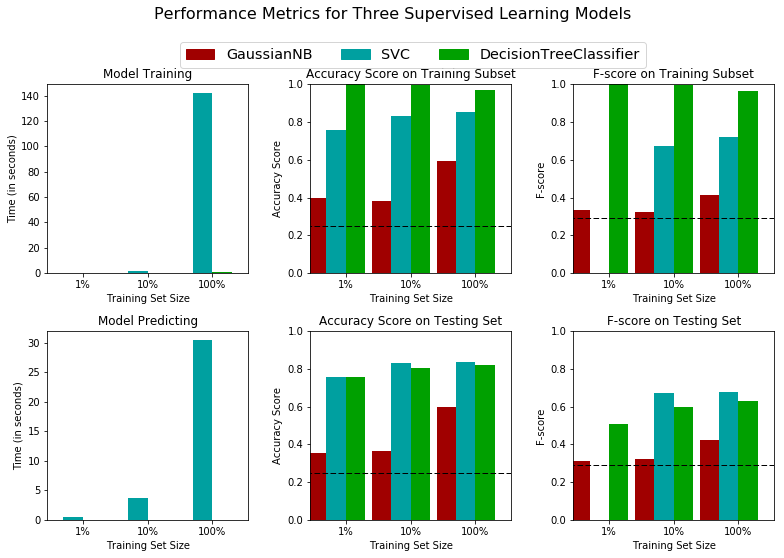

In [57]:
# TODO: Importe os três modelos de aprendizado supervisionado da sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC

# TODO: Inicialize os três modelos
clf_A = GaussianNB()
clf_B = tree.DecisionTreeClassifier()
clf_C = SVC(gamma='auto')

# TODO: Calcule o número de amostras para 1%, 10%, e 100% dos dados de treinamento
# HINT: samples_100 é todo o conjunto de treinamento e.x.: len(y_train)
# HINT: samples_10 é 10% de samples_100
# HINT: samples_1 é 1% de samples_100
samples_100 = len(X_train)
samples_10 = len(X_train)/10
samples_1 = len(X_train)/100

# Colete os resultados dos algoritmos de aprendizado
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Melhorando os resultados
Nesta seção final, você irá escolher o melhor entre os três modelos de aprendizado supervisionado para utilizar nos dados dos estudantes. Você irá então realizar uma busca grid para otimização em todo o conjunto de dados de treino (`X_train` e `y_train`) fazendo o tuning de pelo menos um parâmetro para melhorar o F-score anterior do modelo.

### Questão 3 - Escolhendo o melhor modelo

* Baseado na validação anterior, em um ou dois parágrafos explique para a *CharityML* qual dos três modelos você acredita ser o mais apropriado para a tarefa de identificar indivíduos com remuneração anual superior à \$50,000.  

** DICA: ** 
Analise o gráfico do canto inferior esquerdo da célula acima(a visualização criada através do comando `vs.evaluate(results, accuracy, fscore)`) e verifique o F score para o conjunto de testes quando 100% do conjunto de treino é utilizado. Qual modelo possui o maior score? Sua resposta deve abranger os seguintes pontos:
* métricas - F score no conjunto de testes quando 100% dos dados de treino são utilizados, 
* tempo de predição/treinamento 
* a adequação do algoritmo para este cojunto de dados.

**Resposta: **

Observando os resultados, o algoritmo de Árvores de decisão mostoru os melhores resultados de treinamento, e bons scores em predição. Ainda que em predição ele possua scores um pouco menores que o algoritmo de SVM, o  SVM se mostrou com scores pouco alterados mudando de 10% a 100% das amostras, enquanto a Árvore de Decisão o score aumentou conforme aumentou o número de amostras, significando que a Arvore de decisão melhora conforme aumenta o número de amostras, enquanto SVM pode não mudar sua eficácia mesmo aumentando as amostras.

Além do que, a execução do algoritmo SVM foi claramente mais demorada que a execução da Árvore de decisão, e que com isso, podemos esperar que com mais dados, aleḿ dele não melhorar a sua eficácia em prever novos doadores, pode demorar mais ainda. 

Baseado nisso, considero o algoritmo de Árvore de decisão como o melhor dos três para lidar com nosso problema. 

### Questão 4 - Descrevendo o modelo nos termos de Layman
 
* Em um ou dois parágrafos, explique para a *CharityML*, nos termos de layman, como o modelo final escolhido deveria funcionar. Garanta que você está descrevendo as principais vantagens do modelo, tais como o modo de treinar o modelo e como o modelo realiza a predição. Evite a utilização de jargões matemáticos avançados, como por exemplo a descrição de equações. 

** DICA: **

Quando estiver explicando seu modelo, cite as fontes externas utilizadas, caso utilize alguma.

**Resposta: ** 

Uma árvore de decisão é um método para se verificar se um dado pertence ou não a uma classe. Basicamente, uma Árvore de decisão é um fluxograma, onde e a cada etapa do mesmo é verificado se satifaz alguma condição para escolher a etapa seguinte, até chegar na etapa final onde se decide a qual classe pertence o dado. 

Esses "fluxogramas" são montados de acordo com os dados fornecidos, ou um "caminho" que cada dado percorre, permitindo assim decidir qual "caminho" pela árvore um dado novo pode percorrer.

A vantagem da árvore de decisão é que ele trabalha praticamente somente com os dados, o que o torna muito rapido de implementar e muito rápido de se executar, e fornece um resultado muito preciso. 


### Implementação: Tuning do modelo
Refine o modelo escolhido. Utilize uma busca grid (`GridSearchCV`) com pleo menos um parâmetro importante refinado com pelo menos 3 valores diferentes. Você precisará utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você precisará implementar o seguinte:
- Importar [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Inicializar o classificador escolhido por você e armazená-lo em `clf`.
 - Configurar um `random_state` se houver um disponível para o mesmo estado que você configurou anteriormente.
- Criar um dicionário dos parâmetros que você quer otimizar para o modelo escolhido.
 - Exemplo: `parâmetro = {'parâmetro' : [lista de valores]}`.
 - **Nota:** Evite otimizar o parâmetro `max_features` se este parâmetro estiver disponível! 
- Utilize `make_scorer` para criar um objeto de pontuação `fbeta_score` (com $\beta = 0.5$).
- Realize a busca gride no classificador `clf` utilizando o `'scorer'` e armazene-o na variável `grid_obj`.   
- Adeque o objeto da busca grid aos dados de treino (`X_train`, `y_train`) e armazene em `grid_fit`.

**Nota:** Dependendo do algoritmo escolhido e da lista de parâmetros, a implementação a seguir pode levar algum tempo para executar! 

In [58]:
# TODO: Importar 'GridSearchCV', 'make_scorer', e qualquer biblioteca necessária
from sklearn import grid_search
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit
    
# TODO: Inicializar o classificador
clf = tree.DecisionTreeClassifier()

# TODO: Criar a lista de parâmetros que você quer otimizar, utilizando um dicionário, caso necessário.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'criterion': ['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],'presort':[True,False]}

# TODO: Criar um objeto fbeta_score utilizando make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Realizar uma busca grid no classificador utilizando o 'scorer' como o método de score no GridSearchCV() 
SS = StratifiedShuffleSplit(n_splits=5, random_state = 17 )
cv = SS.get_n_splits(X_train, y_train)

grid_obj =  grid_search.GridSearchCV(clf, param_grid=parameters, cv = cv, scoring=scorer, n_jobs=-1, verbose=10)

# TODO: Adequar o objeto da busca grid como os dados para treinamento e encontrar os parâmetros ótimos utilizando fit() 
grid_fit = grid_obj.fit(X_train, y_train)

# Recuperar o estimador
best_clf = grid_fit.best_estimator_

# Realizar predições utilizando o modelo não otimizado e modelar
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reportar os scores de antes e de depois
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=1 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=1 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=1 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=1 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.5s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=1 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.5s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=1 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.6s
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.6s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=1 ..
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=1

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s


[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.2s
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.6s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=2 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=2 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.3s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=2 ...


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s


[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.5s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.4s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=2 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.6s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=2 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.7s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=2 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.3s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=2 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.5s
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s


[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=3 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.5s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=3 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.5s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=3 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.5s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=3 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.5s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=3 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.2s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=3 ..


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s


[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.2s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=3 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.3s
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.5s
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=4 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=4 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=4 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=3, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=4 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=4, score=0.000000 -   0.4s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=4 ...
[CV]  presor

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s


[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=4 ..
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=4 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=4, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=4, score=0.000000 -   0.5s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=5 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=4, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=5 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=4, score=0.000000 -   0.3s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=5, score=0.000000 -   0.5s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini,

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s


[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=5, score=0.000000 -   0.2s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=5 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=5, score=0.000000 -   0.4s
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=5, score=0.000000 -   0.2s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=5, score=0.000000 -   0.3s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=6 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=6 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=5, score=0.000000 -   0.2s
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=5, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=6 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=6 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.9s


[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.2s
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.2s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=6 ..
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=6 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=7 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.2s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=7 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.6s
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.3s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=7 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=7 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.2s


[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=7 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=7, score=0.000000 -   0.3s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=7 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=7, score=0.000000 -   0.7s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=8 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=7, score=0.000000 -   0.2s
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=7, score=0.000000 -   0.4s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=8 ...
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=8 ...
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=7, score=0.000000 -   0.3s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=8 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=8, score=0.000000 -   0.4s
[CV] presort

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.6s


[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=9, score=0.000000 -   0.4s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=9, score=0.000000 -   0.5s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=9, score=0.000000 -   0.6s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=9, score=0.000000 -   0.6s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=9 ..
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=9, score=0.000000 -   0.2s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=9, score=0.000000 -   0.4s
[CV] presort=Fa

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.7s


[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=10, score=0.000000 -   0.5s
[CV] presort=True, criterion=gini, max_depth=1, min_samples_leaf=10 ..
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=10, score=0.000000 -   0.4s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=10 .
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=10, score=0.000000 -   0.6s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=10 .
[CV]  presort=True, criterion=gini, max_depth=1, min_samples_leaf=10, score=0.000000 -   0.6s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=10 .
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=10, score=0.000000 -   0.3s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=10 .
[CV]  presort=False, criterion=gini, max_depth=1, min_samples_leaf=10, score=0.000000 -   0.3s
[CV] presort=False, criterion=gini, max_depth=1, min_samples_leaf=10 .
[CV]  pr

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   11.8s


[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.667681 -   0.2s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=2 ...
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.652985 -   0.3s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.642187 -   0.8s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.668795 -   0.8s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=2 ..
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.652853 -   0.8s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=2 ..
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.652985 -   0.9s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=2 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.5s


[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.642187 -   0.6s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=3 ...
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.668795 -   0.6s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=3 ..
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.652853 -   0.7s
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.652985 -   0.7s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=3 ..
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=3 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.642187 -   0.4s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=3 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.652853 -   0.3s
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.668795 

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   16.6s


[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=5, score=0.668795 -   0.7s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=5, score=0.642187 -   0.8s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=5 ..
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=5, score=0.652985 -   0.8s
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=5, score=0.652853 -   0.9s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=5 ..
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=5, score=0.642187 -   0.3s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=5, score=0.668795 -   0.3s
[CV] presort=F

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.0s


[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=6, score=0.667681 -   0.8s
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=6, score=0.668795 -   0.3s
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=6, score=0.642187 -   0.5s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=6 ..
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=6 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=6, score=0.652853 -   0.4s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=7 ...
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=6, score=0.652985 -   0.2s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=7 ...
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=7 ...
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=6, score=0.667681 -   0.6s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=7 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   22.3s


[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=8, score=0.652985 -   0.9s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=8, score=0.642187 -   0.4s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=8, score=0.668795 -   0.4s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=8, score=0.652985 -   0.4s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=8, score=0.667681 -   0.9s
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=8, score=0.652853 -   0.6s
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=9 ...
[CV] presort=True, criterion=gini, max_depth=2, min_samples_leaf=9 ...
[CV]  presor

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.9s


[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=10, score=0.642187 -   0.2s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=10 .
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=10, score=0.652853 -   1.1s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=10 .
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=10, score=0.652985 -   1.1s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=10 .
[CV]  presort=True, criterion=gini, max_depth=2, min_samples_leaf=10, score=0.667681 -   1.0s
[CV] presort=False, criterion=gini, max_depth=2, min_samples_leaf=10 .
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=10, score=0.668795 -   0.4s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=1 ...
[CV]  presort=False, criterion=gini, max_depth=2, min_samples_leaf=10, score=0.652853 -   0.4s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=1 ...
[CV]  p

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   30.1s


[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=2, score=0.709735 -   0.6s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=2 ..
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=2, score=0.696790 -   0.5s
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=2, score=0.689811 -   0.6s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=2 ..
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=3 ...
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=2, score=0.702434 -   1.1s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=3 ...
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=2, score=0.688185 -   0.4s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=3 ...
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=2, score=0.702434 -   0.7s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=3 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   34.3s


[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=4, score=0.709735 -   0.5s
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=4, score=0.689811 -   0.6s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=4 ..
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=4 ..
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=4, score=0.702434 -   0.9s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=5 ...
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=4, score=0.696790 -   0.7s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=5 ...
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=4, score=0.688185 -   0.6s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=5 ...
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=4, score=0.702434 -   0.9s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=5 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   39.1s


[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=6, score=0.688185 -   0.4s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=7 ...
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=6, score=0.702434 -   0.5s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=7 ...
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=7, score=0.709735 -   0.8s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=7 ...
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=7, score=0.689811 -   0.9s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=7 ..
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=7, score=0.696790 -   0.9s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=7 ..
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=7, score=0.688185 -   0.9s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=7 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   43.6s


[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=9, score=0.709735 -   0.9s
[CV] presort=True, criterion=gini, max_depth=3, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=9, score=0.689811 -   1.1s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=9, score=0.688185 -   1.0s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=3, min_samples_leaf=9, score=0.696790 -   1.3s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=9 ..
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=9, score=0.689811 -   0.7s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=9 ..
[CV]  presort=False, criterion=gini, max_depth=3, min_samples_leaf=9, score=0.709735 -   0.6s
[CV] presort=False, criterion=gini, max_depth=3, min_samples_leaf=9 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   49.6s


[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.700031 -   0.4s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.700377 -   1.3s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=2 ...
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.687843 -   0.6s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.699346 -   0.8s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.687843 -   1.1s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=2 ..
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.719338 -   1.4s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=2 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   55.0s


[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.699346 -   1.3s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=4 ...
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.687843 -   0.8s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=4 ..
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.719338 -   1.3s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=4 ..
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.697639 -   1.3s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=4 ..
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.699346 -   0.5s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=4 ..
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.719338 -   0.5s
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.697639 

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min


[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=6, score=0.699937 -   1.4s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=7 ...
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=6, score=0.699937 -   0.8s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=7 ...
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=7, score=0.719338 -   1.1s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=7 ...
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=7, score=0.697214 -   1.0s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=7 ..
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=7, score=0.698940 -   1.6s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=7 ..
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=7, score=0.719338 -   0.4s
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=7, score=0.699937 -

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.1min


[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=9, score=0.719038 -   0.6s
[CV] presort=False, criterion=gini, max_depth=4, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=9, score=0.699405 -   1.3s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=10 ..
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=9, score=0.697214 -   0.6s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=10 ..
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=9, score=0.688185 -   0.6s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=10 ..
[CV]  presort=False, criterion=gini, max_depth=4, min_samples_leaf=9, score=0.699405 -   0.8s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=10 ..
[CV]  presort=True, criterion=gini, max_depth=4, min_samples_leaf=10, score=0.698620 -   1.2s
[CV] presort=True, criterion=gini, max_depth=4, min_samples_leaf=10 ..
[CV]  preso

[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.3min


[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=2, score=0.712777 -   0.6s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=2 ..
[CV]  presort=True, criterion=gini, max_depth=5, min_samples_leaf=2, score=0.706842 -   1.8s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=2 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=2, score=0.735928 -   0.7s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=2 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=2, score=0.710550 -   0.5s
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=2, score=0.706842 -   0.7s
[CV] presort=True, criterion=gini, max_depth=5, min_samples_leaf=3 ...
[CV]  presort=True, criterion=gini, max_depth=5, min_samples_leaf=2, score=0.719744 -   1.4s
[CV] presort=True, criterion=gini, max_depth=5, min_samples_leaf=3 ...
[CV] presort=True, criterion=gini, max_depth=5, min_samples_leaf=3 ...
[CV]  presor

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min


[CV]  presort=True, criterion=gini, max_depth=5, min_samples_leaf=5, score=0.712347 -   1.6s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=5 ..
[CV]  presort=True, criterion=gini, max_depth=5, min_samples_leaf=5, score=0.706415 -   1.5s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=5, score=0.712347 -   0.7s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=5, score=0.736233 -   0.6s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=5, score=0.711194 -   0.5s
[CV] presort=True, criterion=gini, max_depth=5, min_samples_leaf=6 ...
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=5, score=0.706415 -   0.7s
[CV] presort=True, criterion=gini, max_depth=5, min_samples_leaf=6 ...
[CV]  presor

[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:  1.5min


[CV]  presort=True, criterion=gini, max_depth=5, min_samples_leaf=8, score=0.711194 -   1.5s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=8, score=0.712551 -   0.7s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=8, score=0.707339 -   0.6s
[CV] presort=False, criterion=gini, max_depth=5, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=8, score=0.735185 -   1.0s
[CV] presort=True, criterion=gini, max_depth=5, min_samples_leaf=9 ...
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=8, score=0.719956 -   0.7s
[CV] presort=True, criterion=gini, max_depth=5, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=5, min_samples_leaf=8, score=0.719956 -   1.9s
[CV]  presort=False, criterion=gini, max_depth=5, min_samples_leaf=8, score=0.71119

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.7min


[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.739671 -   0.7s
[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.722618 -   0.9s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=1 ..
[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.734908 -   0.6s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=1 ..
[CV] presort=True, criterion=gini, max_depth=6, min_samples_leaf=2 ...
[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.727635 -   0.7s
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.738889 -   1.8s
[CV] presort=True, criterion=gini, max_depth=6, min_samples_leaf=2 ...
[CV] presort=True, criterion=gini, max_depth=6, min_samples_leaf=2 ...
[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.739358 -   0.8s
[CV] presort=True, criterion=gini, max_depth=6, min_samples_leaf=2 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  1.9min


[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=4, score=0.737913 -   0.7s
[CV] presort=True, criterion=gini, max_depth=6, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=5, score=0.740440 -   1.6s
[CV] presort=True, criterion=gini, max_depth=6, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=5, score=0.722937 -   1.6s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=5 ..
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=5, score=0.735090 -   1.9s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=5 ..
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=5, score=0.727955 -   1.8s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=5, score=0.722937 -   0.6s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=5 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:  2.0min


[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=8, score=0.722096 -   1.7s
[CV] presort=True, criterion=gini, max_depth=6, min_samples_leaf=8 ...
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=8, score=0.731369 -   1.3s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=8 ..
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=8, score=0.727509 -   1.6s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=8 ..
[CV]  presort=True, criterion=gini, max_depth=6, min_samples_leaf=8, score=0.739702 -   1.8s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=8, score=0.722096 -   0.7s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=6, min_samples_leaf=8, score=0.731369 -   0.6s
[CV] presort=False, criterion=gini, max_depth=6, min_samples_leaf=8 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  2.2min


[CV]  presort=False, criterion=gini, max_depth=7, min_samples_leaf=1, score=0.730193 -   0.9s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=2 ...
[CV]  presort=False, criterion=gini, max_depth=7, min_samples_leaf=1, score=0.727955 -   0.9s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=2 ...
[CV]  presort=False, criterion=gini, max_depth=7, min_samples_leaf=1, score=0.730828 -   0.9s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=1, score=0.730251 -   2.4s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=2, score=0.721775 -   1.6s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=2 ...
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=2, score=0.739579 -   2.1s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=2 ..
[CV]  presort

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min


[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=5, score=0.722298 -   2.2s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=5 ...
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=5, score=0.730425 -   1.9s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=5 ..
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=5, score=0.739777 -   2.3s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=5 ..
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=5, score=0.728593 -   1.9s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=7, min_samples_leaf=5, score=0.722298 -   0.7s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=5 ..
[CV]  presort=False, criterion=gini, max_depth=7, min_samples_leaf=5, score=0.739777 -   0.7s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=5 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  2.7min


[CV]  presort=False, criterion=gini, max_depth=7, min_samples_leaf=8, score=0.728593 -   1.0s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=9 ...
[CV]  presort=False, criterion=gini, max_depth=7, min_samples_leaf=8, score=0.732362 -   1.1s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=9, score=0.721602 -   2.2s
[CV] presort=True, criterion=gini, max_depth=7, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=9, score=0.738290 -   2.4s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=9, score=0.727636 -   2.2s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=9 ..
[CV]  presort=True, criterion=gini, max_depth=7, min_samples_leaf=9, score=0.728467 -   2.2s
[CV] presort=False, criterion=gini, max_depth=7, min_samples_leaf=9 ..
[CV]  presort=

[Parallel(n_jobs=-1)]: Done 714 tasks      | elapsed:  3.0min


[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.737753 -   1.1s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=2 ..
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.735021 -   0.8s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=3 ...
[CV]  presort=True, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.738409 -   2.0s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=3 ...
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.731307 -   0.9s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=3 ...
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.737787 -   0.9s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=3 ...
[CV]  presort=True, criterion=gini, max_depth=8, min_samples_leaf=3, score=0.738493 -   2.2s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=3 ...
[CV]  presor

[Parallel(n_jobs=-1)]: Done 753 tasks      | elapsed:  3.2min


[CV]  presort=True, criterion=gini, max_depth=8, min_samples_leaf=6, score=0.730000 -   2.7s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=6 ..
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=6, score=0.721858 -   0.8s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=6 ..
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=6, score=0.736273 -   0.8s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=6 ..
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=6, score=0.730000 -   0.8s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=7 ...
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=6, score=0.734475 -   1.0s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=7 ...
[CV]  presort=True, criterion=gini, max_depth=8, min_samples_leaf=6, score=0.736311 -   2.4s
[CV] presort=True, criterion=gini, max_depth=8, min_samples_leaf=7 ...
[CV]  presor

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min


[CV]  presort=True, criterion=gini, max_depth=8, min_samples_leaf=10, score=0.731028 -   2.8s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=10 .
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=10, score=0.720107 -   0.8s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=10 .
[CV]  presort=True, criterion=gini, max_depth=8, min_samples_leaf=10, score=0.729226 -   2.7s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=10 .
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=10, score=0.735838 -   0.9s
[CV] presort=False, criterion=gini, max_depth=8, min_samples_leaf=10 .
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=10, score=0.731028 -   0.8s
[CV]  presort=False, criterion=gini, max_depth=8, min_samples_leaf=10, score=0.729226 -   0.7s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=1 ...
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=1 ...
[CV]  

[Parallel(n_jobs=-1)]: Done 833 tasks      | elapsed:  3.8min


[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=4, score=0.722816 -   1.0s
[CV] presort=False, criterion=gini, max_depth=9, min_samples_leaf=4 ..
[CV]  presort=True, criterion=gini, max_depth=9, min_samples_leaf=4, score=0.725716 -   3.1s
[CV] presort=False, criterion=gini, max_depth=9, min_samples_leaf=4 ..
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=4, score=0.733952 -   1.0s
[CV] presort=False, criterion=gini, max_depth=9, min_samples_leaf=4 ..
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=4, score=0.737620 -   0.8s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=5 ...
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=4, score=0.725829 -   0.7s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=5 ...
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=4, score=0.738439 -   1.3s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=5 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  4.2min


[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=8, score=0.723657 -   1.1s
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=8, score=0.732678 -   1.0s
[CV] presort=False, criterion=gini, max_depth=9, min_samples_leaf=8 ..
[CV] presort=False, criterion=gini, max_depth=9, min_samples_leaf=8 ..
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=8, score=0.733858 -   1.4s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=9 ...
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=8, score=0.730683 -   1.2s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=9 ...
[CV]  presort=False, criterion=gini, max_depth=9, min_samples_leaf=8, score=0.739062 -   1.2s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=9 ...
[CV]  presort=True, criterion=gini, max_depth=9, min_samples_leaf=8, score=0.739062 -   3.7s
[CV] presort=True, criterion=gini, max_depth=9, min_samples_leaf=9 ...
[CV]  preso

[Parallel(n_jobs=-1)]: Done 917 tasks      | elapsed:  4.6min


[CV]  presort=False, criterion=gini, max_depth=10, min_samples_leaf=2, score=0.721533 -   1.4s
[CV] presort=True, criterion=gini, max_depth=10, min_samples_leaf=3 ..
[CV]  presort=False, criterion=gini, max_depth=10, min_samples_leaf=2, score=0.741513 -   1.3s
[CV] presort=True, criterion=gini, max_depth=10, min_samples_leaf=3 ..
[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=2, score=0.739093 -   4.2s
[CV] presort=True, criterion=gini, max_depth=10, min_samples_leaf=3 ..
[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=3, score=0.723953 -   3.6s
[CV] presort=True, criterion=gini, max_depth=10, min_samples_leaf=3 ..
[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=3, score=0.730982 -   3.3s
[CV] presort=False, criterion=gini, max_depth=10, min_samples_leaf=3 .
[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=3, score=0.738629 -   3.2s
[CV] presort=False, criterion=gini, max_depth=10, min_samples_leaf=3 .
[CV]  pr

[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:  5.1min


[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=7, score=0.733728 -   3.5s
[CV] presort=True, criterion=gini, max_depth=10, min_samples_leaf=7 ..
[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=7, score=0.734157 -   3.6s
[CV] presort=False, criterion=gini, max_depth=10, min_samples_leaf=7 .
[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=7, score=0.721052 -   4.5s
[CV] presort=False, criterion=gini, max_depth=10, min_samples_leaf=7 .
[CV]  presort=False, criterion=gini, max_depth=10, min_samples_leaf=7, score=0.721052 -   1.1s
[CV] presort=False, criterion=gini, max_depth=10, min_samples_leaf=7 .
[CV]  presort=True, criterion=gini, max_depth=10, min_samples_leaf=7, score=0.728754 -   4.6s
[CV] presort=False, criterion=gini, max_depth=10, min_samples_leaf=7 .
[CV]  presort=False, criterion=gini, max_depth=10, min_samples_leaf=7, score=0.733758 -   1.0s
[CV] presort=False, criterion=gini, max_depth=10, min_samples_leaf=7 .
[CV]  pr

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.6min


[CV]  presort=False, criterion=entropy, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.4s
[CV] presort=True, criterion=entropy, max_depth=1, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.3s
[CV] presort=True, criterion=entropy, max_depth=1, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.2s
[CV]  presort=False, criterion=entropy, max_depth=1, min_samples_leaf=1, score=0.000000 -   0.3s
[CV] presort=True, criterion=entropy, max_depth=1, min_samples_leaf=2 
[CV] presort=True, criterion=entropy, max_depth=1, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=1, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=1, min_samples_leaf=2, score=0.000000 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=1, min_samples_l

[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed:  5.7min


[CV]  presort=True, criterion=entropy, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=1, min_samples_leaf=6 
[CV]  presort=True, criterion=entropy, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=1, min_samples_leaf=6 
[CV]  presort=True, criterion=entropy, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.8s
[CV] presort=False, criterion=entropy, max_depth=1, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.2s
[CV]  presort=True, criterion=entropy, max_depth=1, min_samples_leaf=6, score=0.000000 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=1, min_samples_leaf=6 
[CV] presort=False, criterion=entropy, max_depth=1, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=1, min_samples_leaf=6, score=0.000000 -   0.4s
[CV] presort=False, criterion=entropy, max_depth=1, min_samples

[Parallel(n_jobs=-1)]: Done 1097 tasks      | elapsed:  5.8min


[CV] presort=True, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=1, min_samples_leaf=10, score=0.000000 -   0.4s
[CV] presort=True, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.642187 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.652985 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.668795 -   1.1s
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.651708 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.642187 -

[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  6.0min


[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=5, score=0.642187 -   0.4s
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=5, score=0.668795 -   0.4s
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=5 
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=5, score=0.651708 -   0.4s
[CV] presort=True, criterion=entropy, max_depth=2, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=5, score=0.518176 -   0.5s
[CV] presort=True, criterion=entropy, max_depth=2, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=5, score=0.652985 -   0.6s
[CV]  presort=True, criterion=entropy, max_depth=2, min_samples_leaf=5, score=0.518176 -   1.1s
[CV] presort=True, criterion=entropy, max_depth=2, min_samples_leaf=6 
[CV] presort=True, criterion=entropy, max_depth=2, min_samples

[CV]  presort=True, criterion=entropy, max_depth=2, min_samples_leaf=10, score=0.652985 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10 


[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed:  6.1min


[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10, score=0.642187 -   0.4s
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10 
[CV]  presort=True, criterion=entropy, max_depth=2, min_samples_leaf=10, score=0.518176 -   0.7s
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10, score=0.668795 -   0.3s
[CV] presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10 
[CV] presort=True, criterion=entropy, max_depth=3, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10, score=0.652985 -   0.4s
[CV] presort=True, criterion=entropy, max_depth=3, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10, score=0.651708 -   0.5s
[CV] presort=True, criterion=entropy, max_depth=3, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=2, min_samples_leaf=10, score=0.518176 -   0.4s
[CV] presort=True, criterion=entropy, max_depth=3, min

[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min


[CV]  presort=True, criterion=entropy, max_depth=3, min_samples_leaf=5, score=0.695864 -   1.2s
[CV] presort=False, criterion=entropy, max_depth=3, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=5, score=0.689811 -   0.6s
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=5, score=0.709735 -   0.4s
[CV] presort=False, criterion=entropy, max_depth=3, min_samples_leaf=5 
[CV] presort=False, criterion=entropy, max_depth=3, min_samples_leaf=5 
[CV]  presort=True, criterion=entropy, max_depth=3, min_samples_leaf=5, score=0.702434 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=3, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=5, score=0.695864 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=3, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=5, score=0.688185 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=3, min_samples

[CV]  presort=True, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.695864 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10 
[CV]  presort=True, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.709735 -   1.2s
[CV] presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10 


[Parallel(n_jobs=-1)]: Done 1293 tasks      | elapsed:  6.5min


[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.689811 -   0.5s
[CV] presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.695864 -   0.4s
[CV] presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.709735 -   0.6s
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.688185 -   0.3s
[CV] presort=True, criterion=entropy, max_depth=4, min_samples_leaf=1 
[CV] presort=True, criterion=entropy, max_depth=4, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.702434 -   0.4s
[CV] presort=True, criterion=entropy, max_depth=4, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=3, min_samples_leaf=10, score=0.702434 -   1.3s
[CV] presort=True, criterion=entropy, max_depth=4, min

[CV] presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5 
[CV] presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5 


[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:  6.7min


[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5, score=0.691063 -   0.7s
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5, score=0.710679 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5, score=0.695864 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5 
[CV] presort=True, criterion=entropy, max_depth=4, min_samples_leaf=6 
[CV]  presort=True, criterion=entropy, max_depth=4, min_samples_leaf=5, score=0.703422 -   1.1s
[CV] presort=True, criterion=entropy, max_depth=4, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5, score=0.688185 -   0.7s
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=5, score=0.703422 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=4, min_samples_leaf=6 
[CV] presort=True, criterion=entropy, max_depth=4, min_samples

[CV]  presort=True, criterion=entropy, max_depth=4, min_samples_leaf=10, score=0.688185 -   1.1s
[CV] presort=False, criterion=entropy, max_depth=4, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=10, score=0.690725 -   0.5s
[CV] presort=False, criterion=entropy, max_depth=4, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=10, score=0.709735 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=4, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=10, score=0.695864 -   0.7s
[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=4, min_samples_leaf=10, score=0.702434 -   1.3s
[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=4, min_samples_leaf=10, score=0.688185 -   0.7s
[CV]  presort=False, criterion=entropy, max_depth=4, 

[Parallel(n_jobs=-1)]: Done 1397 tasks      | elapsed:  6.9min


[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1, score=0.709129 -   1.6s
[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1, score=0.728691 -   1.8s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1, score=0.692418 -   1.7s
[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=1, score=0.715142 -   1.8s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=5, min_samples_leaf=1, score=0.709129 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  presort=Fals

[CV]  presort=False, criterion=entropy, max_depth=5, min_samples_leaf=5, score=0.692771 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=5, min_samples_leaf=5, score=0.721996 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=6 


[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.2min


[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=6, score=0.728691 -   1.4s
[CV] presort=True, criterion=entropy, max_depth=5, min_samples_leaf=6 
[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=6, score=0.708703 -   1.7s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=6 
[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=6, score=0.714393 -   1.8s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=5, min_samples_leaf=6, score=0.708703 -   0.5s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=6 
[CV]  presort=True, criterion=entropy, max_depth=5, min_samples_leaf=6, score=0.692771 -   1.6s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=5, min_samples_leaf=6, score=0.728691 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=5, min_samples

[CV]  presort=False, criterion=entropy, max_depth=5, min_samples_leaf=10, score=0.720974 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.732107 -   1.5s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.721665 -   2.2s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.740435 -   2.0s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.718266 -   2.2s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.740129 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples

[Parallel(n_jobs=-1)]: Done 1505 tasks      | elapsed:  7.5min


[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.722111 -   1.1s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.732107 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.718266 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.737627 -   2.1s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.738095 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=2, score=0.721665 -   1.8s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_l

[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=6, score=0.718808 -   2.1s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=6, score=0.740435 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=6, score=0.731973 -   0.7s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=6, score=0.718808 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=6, score=0.737484 -   0.9s
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=6, score=0.737484 -   2.2s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_

[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  7.8min


[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7, score=0.721665 -   1.6s
[CV] presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7, score=0.740435 -   1.8s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7, score=0.731973 -   1.8s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples_leaf=7, score=0.718808 -   2.1s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=7, score=0.721665 -   0.8s
[CV] presort=False, criterion=entropy, max_depth=6, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=6, min_samples_leaf=7, score=0.731973 -   0.6s
[CV]  presort=True, criterion=entropy, max_depth=6, min_samples

[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=1, score=0.733262 -   2.4s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.724017 -   2.3s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.737657 -   2.3s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.729562 -   2.2s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.722763 -   2.3s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.724582 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_l

[Parallel(n_jobs=-1)]: Done 1617 tasks      | elapsed:  8.2min


[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.722644 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=3 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.733662 -   1.1s
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=2, score=0.733662 -   2.5s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=3 
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=3 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=3, score=0.724260 -   2.2s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=3 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=3, score=0.737994 -   2.3s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_leaf=3 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=3, score=0.731707 -   1.9s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_le

[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=7, score=0.731264 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=7, score=0.723924 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=7, score=0.728975 -   2.0s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=7, score=0.728975 -   1.1s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.723169 -   1.5s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8 
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.736192 -   1.8s
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_le

[Parallel(n_jobs=-1)]: Done 1674 tasks      | elapsed:  8.5min


[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.723169 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_leaf=8 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.736192 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=7, min_samples_leaf=8 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.730635 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=9 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.728912 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=9 
[CV]  presort=False, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.724363 -   0.8s
[CV]  presort=True, criterion=entropy, max_depth=7, min_samples_leaf=8, score=0.728912 -   2.0s
[CV] presort=True, criterion=entropy, max_depth=7, min_samples_leaf=9 
[CV] presort=True, criterion=entropy, max_depth=7, min_samples

[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.722866 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.739897 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3 
[CV]  presort=True, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.729703 -   2.0s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.732161 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.738962 -   0.5s
[CV] presort=True, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.729703 -   0.7s
[CV] presort=True, criterion=entropy, max_depth=8, min_sample

[Parallel(n_jobs=-1)]: Done 1733 tasks      | elapsed:  8.9min


[CV]  presort=True, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.729525 -   1.8s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.738996 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.723090 -   0.8s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.730675 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=8, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.729525 -   0.6s
[CV] presort=True, criterion=entropy, max_depth=8, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.736379 -   0.7s
[CV] presort=True, criterion=entropy, max_depth=8, min_sample

[CV]  presort=True, criterion=entropy, max_depth=8, min_samples_leaf=9, score=0.731028 -   2.1s
[CV]  presort=True, criterion=entropy, max_depth=8, min_samples_leaf=9, score=0.730177 -   2.0s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9 
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9, score=0.723090 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9, score=0.731028 -   0.6s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9, score=0.736365 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=8, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=9, score=0.730177 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=8, min_sampl

[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.2min


[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10 
[CV]  presort=True, criterion=entropy, max_depth=8, min_samples_leaf=10, score=0.730594 -   2.6s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10, score=0.721960 -   0.8s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10, score=0.735665 -   0.9s
[CV] presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10 
[CV]  presort=True, criterion=entropy, max_depth=8, min_samples_leaf=10, score=0.735841 -   2.1s
[CV] presort=True, criterion=entropy, max_depth=9, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10, score=0.732507 -   1.1s
[CV] presort=True, criterion=entropy, max_depth=9, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=8, min_samples_leaf=10, scor

[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5 
[CV]  presort=True, criterion=entropy, max_depth=9, min_samples_leaf=5, score=0.729757 -   2.7s
[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5 
[CV]  presort=True, criterion=entropy, max_depth=9, min_samples_leaf=5, score=0.737890 -   3.2s
[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5, score=0.721649 -   0.7s
[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5, score=0.741627 -   0.8s
[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5, score=0.737347 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=9, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=5, score=0.72975

[Parallel(n_jobs=-1)]: Done 1853 tasks      | elapsed:  9.7min


[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=6 
[CV]  presort=True, criterion=entropy, max_depth=9, min_samples_leaf=6, score=0.729462 -   3.2s
[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=6, score=0.740015 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=9, min_samples_leaf=6 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=6, score=0.738596 -   1.2s
[CV] presort=True, criterion=entropy, max_depth=9, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=6, score=0.729462 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=9, min_samples_leaf=7 
[CV]  presort=True, criterion=entropy, max_depth=9, min_samples_leaf=6, score=0.736517 -   2.7s
[CV] presort=True, criterion=entropy, max_depth=9, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=9, min_samples_leaf=6, score=0.736517 

[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1 
[CV]  presort=True, criterion=entropy, max_depth=10, min_samples_leaf=1, score=0.726150 -   3.5s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1, score=0.739491 -   0.8s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1, score=0.724466 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1, score=0.728771 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1, score=0.727686 -   0.8s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=1, s

[Parallel(n_jobs=-1)]: Done 1914 tasks      | elapsed: 10.2min


[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=2, score=0.742392 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=2, score=0.726496 -   1.1s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=2 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=2, score=0.730060 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=2, score=0.727623 -   1.2s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=2, score=0.740368 -   1.2s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=3 
[CV]  presort=True, criterion=entropy, max_depth=10, min_samples_leaf=2, score=0.740661 -   4.0s
[CV] presort=True, criterion=entropy, max_depth=10,

[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7 
[CV]  presort=True, criterion=entropy, max_depth=10, min_samples_leaf=7, score=0.729535 -   3.8s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7, score=0.723507 -   1.0s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7, score=0.739865 -   1.1s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7, score=0.729535 -   1.1s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=8 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7, score=0.731829 -   1.2s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=8 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=7, s

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 10.8min


[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=8, score=0.731707 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=9 
[CV]  presort=False, criterion=entropy, max_depth=10, min_samples_leaf=8, score=0.738342 -   0.9s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=9 
[CV]  presort=True, criterion=entropy, max_depth=10, min_samples_leaf=8, score=0.738342 -   3.4s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=9 
[CV]  presort=True, criterion=entropy, max_depth=10, min_samples_leaf=9, score=0.742126 -   3.1s
[CV] presort=True, criterion=entropy, max_depth=10, min_samples_leaf=9 
[CV]  presort=True, criterion=entropy, max_depth=10, min_samples_leaf=9, score=0.726325 -   3.6s
[CV] presort=False, criterion=entropy, max_depth=10, min_samples_leaf=9 
[CV]  presort=True, criterion=entropy, max_depth=10, min_samples_leaf=9, score=0.726411 -   3.1s
[CV] presort=False, criterion=entropy, max_depth=10, mi

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 11.0min finished


Unoptimized model
------
Accuracy score on testing data: 0.8180
F-score on testing data: 0.6268

Optimized Model
------
Final accuracy score on the testing data: 0.8555
Final F-score on the testing data: 0.7238


### Questão 5 - Validação final do modelo

* Qual é a accuracy e o F-score do modelo otimizado utilizando os dados de testes?
* Estes scores são melhores ou piores do que o modelo antes da otimização? 
* Como os resultados do modelo otimizado se comparam aos benchmarks do naive predictor que você encontrou na **Questão 1**?_

**Nota:** Preencha a tabela abaixo com seus resultados e então responda as questões no campo **Resposta** 

#### Resultados:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.8180            | 0.8555          |
| F-score        | 0.6268            | 0.7238          |


**Resposta: **

- O valor de accuracy e f-score do modelo otimizado é 0.86 e 0.72 respectivamente.
- A acuracia melhorou apenas um pouco, enquanto o F-score melhorou significamente.
- Os valores melhoraram muito, considerando principalmente que os valores encontrados na questão 1 foram encontrados com paramêtros padrão do modelo.  

----
## Importância dos atributos

Uma tarefa importante quando realizamos aprendizado supervisionado em um conjunto de dados como os dados do censo que estudamos aqui é determinar quais atributos fornecem maior poder de predição. Focando no relacionamento entre alguns poucos atributos mais importantes e na label alvo nós simplificamos muito o nosso entendimento do fenômeno, que é a coisa mais importante a se fazer. No caso deste projeto, isso significa que nós queremos identificar um pequeno número de atributos que possuem maior chance de predizer se um indivíduo possui renda anual superior à \$50,000.

Escolha um classificador da scikit-learn (e.x.: adaboost, random forests) que possua o atributo `feature_importance_`, que é uma função que calcula o ranking de importância dos atributos de acordo com o classificador escolhido. Na próxima célula python ajuste este classificador para o conjunto de treinamento e utilize este atributo para determinar os 5 atributos mais importantes do conjunto de dados do censo.

### Questão 6 - Observação da Relevância dos Atributos
Quando **Exploramos os dados**, vimos que existem treze atributos disponíveis para cada registro nos dados do censo. Destes treze atributos, quais os 5 atributos que você acredita que são os mais importantes para predição e em que ordem você os ranquearia? Por quê?

**Resposta:**

Os 5 features que considero mais importantes são: hours-per-week, capital-gain, capital-loss, occupation e education-num.Ordenando do mais importante para o menos importante:

- hours-per-week indica o quanto a pessoa trabalha, que por consequencia, influencia o quanto ela ganha. 
- capital-gain e capital-loss indicam o quanto a pessoa ganha e sua despesa, então a renda líquida dela é dita por - esses features, e quanto maior a renda, maior a chance dela doar 50K. 
- occupation é importante, pois o tipo de trabalho determina o quanto a pessoa ganha, ainda que o salário de um mesmo cargo em duas empresas diferentes podem render salarios diferentes. 
- education-num é importante porque quanto maior o nível educacional, maiores chances de um bom emprego uma pessoa tem, e portante, maiores chances não quer dizer certeza, ela pode ter boa educacao e estar num emprego ruim. 

### Implementação - Extraindo a importância do atributo
Escolha um algoritmo de aprendizado supervisionado da `sciki-learn` que possui o atributo `feature_importance_` disponível. Este atributo é uma função que ranqueia a importância de cada atributo dos registros do conjunto de dados quando realizamos predições baseadas no algoritmo escolhido.

Na célula de código abaixo, você precisará implementar o seguinte:
 - Importar um modelo de aprendizado supervisionado da sklearn se este for diferente dos três usados anteriormente. 
 - Treinar o modelo supervisionado com todo o conjunto de treinamento.
 - Extrair a importância dos atributos utilizando `'.feature_importances_'`.

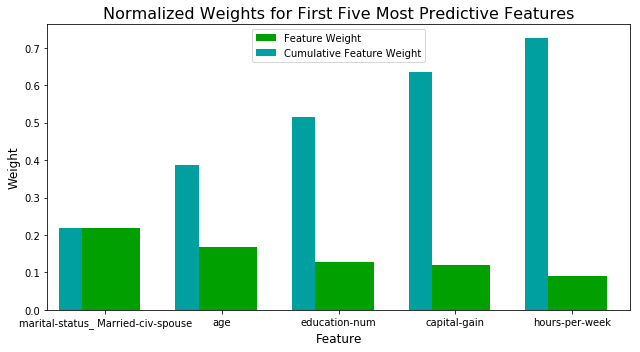

In [59]:
# TODO: Importar um modelo de aprendizado supervisionado que tenha 'feature_importances_'
from sklearn.tree import DecisionTreeClassifier

# TODO: Treinar o modelo utilizando o conjunto de treinamento com .fit(X_train, y_train)
model = DecisionTreeClassifier().fit(X_train,y_train)

# TODO: Extrair a importância dos atributos utilizando .feature_importances_ 
importances = model.feature_importances_

# Plotar
vs.feature_plot(importances, X_train, y_train)

### Questão 7 - Extraindo importância dos atributos

Observe a visualização criada acima que exibe os cinco atributos mais relevantes para predizer se um indivíduo possui remuneração igual ou superior à \$50,000 por ano.

* Como estes cinco atributos se comparam com os 5 atributos que você discutiu na **Questão 6**? 
* Se você estivesse próximo da mesma resposta, como esta visualização confirma o seu raciocínio? 
* Se você não estava próximo, por que você acha que estes atributos são mais relevantes? 

**Resposta:**

- O gráfico mostra que o hours-per-week e capital-gain são muito importantes, como eu tinha descrito, mas errei nos outros atributos, apenas que eu enumerei o education-num como um dos atributos, mas com importancia menor que o gráfico mostrou.
- meu raciocinio foi simples: quantitativamente, quanto mais se trabalha e com maior escolaridade, mais se ganha, e o gráfico vai no sentido dessa ideia.
- eu cheguei próximo.

### Selecionando atributos

Como um modelo performa se nós só utilizamos um subconjunto de todos os atributos disponíveis nos dados? Com menos atributos necessários para treinar, a expectativa é que o treinamento e a predição sejam executados em um tempo muito menor — com o custo da redução nas métricas de performance. A partir da visualização acima, nós vemos que os cinco atributos mais importantes contribuem para mais de 50% da importância de **todos** os atributos presentes nos dados. Isto indica que nós podemos tentar *reduzir os atributos* e simplificar a informação necessária para o modelo aprender. O código abaixo utilizará o mesmo modelo otimizado que você encontrou anteriormente e treinará o modelo com o mesmo conjunto de dados de treinamento, porém apenas com *os cinco atributos mais importantes*

In [60]:
# Importar a funcionalidade para clonar um modelo
from sklearn.base import clone

# Reduzir a quantidade de atributos
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Treinar o melhor modelo encontrado com a busca grid anterior
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Fazer novas predições
reduced_predictions = clf.predict(X_test_reduced)

# Reportar os scores do modelo final utilizando as duas versões dos dados.
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8555
F-score on testing data: 0.7238

Final Model trained on reduced data
------
Accuracy on testing data: 0.8427
F-score on testing data: 0.6812


### Questão 8 - Efeitos da seleção de atributos

* Como o F-score do modelo final e o accuracy score do conjunto de dados reduzido utilizando apenas cinco atributos se compara aos mesmos indicadores utilizando todos os atributos? 
* Se o tempo de treinamento é uma variável importante, você consideraria utilizar os dados enxutos como seu conjunto de treinamento? 


**Resposta:**

- Realmente, os valores do modelo com atributos reduzidos são bem próximos dos com atributos totais.
- Sim, claramente, já que o modelo reduzido mantêm a precisão muito próxima do modelo com todos os atributos.

> **Nota**: Uma vez que você tenha concluído toda a implementação de código e respondido cada uma das questões acima, você poderá finalizar o seu trabalho exportando o iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima navegando para 
**File -> Download as -> HTML (.html)**. Inclua este documento junto do seu notebook como sua submissão.